# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [13]:
import pandas as pd
import time
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# data viz
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
# plt.rcdefaults() # to get the default plot 
plt.style.use('ggplot')

# ml models
from sklearn.svm import SVC #Support vector classifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier

# validation
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# for ignoring warnings
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

print("All modules loaded")

All modules loaded


In [15]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [17]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [22]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

## Business Objective: 
### The primary goal is to predict whether a client will subscribe to a deposit term. 
* By identifying the most effective classification model for predicting customer subscription to bank products using historical campaign data, the bank can strategically allocate its marketing resources towards the most promising leads, thereby maximizing the return on investment for its marketing activities.

In [28]:
# Explore the column data feature values and summative counts for each response and possibly outlyers not will skew the model 
for column in df.columns:
    print(f"Column: {column}")
    print(df[column].value_counts())
    print("\n")

Column: age
age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: count, Length: 78, dtype: int64


Column: job
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64


Column: marital
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64


Column: education
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64


Column: default
default
no         32588
unknown     8597
yes            3
Name: count, dty

In [30]:
#removal of features. 
#delete the duration, default, day_of_week

# List of columns to drop
columns_to_drop = ['duration', 'default', 'day_of_week', 'pdays']

# Drop the columns
df_new = df.drop(columns=columns_to_drop)

# Display the new DataFrame
print(df_new)

       age          job  marital            education housing loan    contact  \
0       56    housemaid  married             basic.4y      no   no  telephone   
1       57     services  married          high.school      no   no  telephone   
2       37     services  married          high.school     yes   no  telephone   
3       40       admin.  married             basic.6y      no   no  telephone   
4       56     services  married          high.school      no  yes  telephone   
...    ...          ...      ...                  ...     ...  ...        ...   
41183   73      retired  married  professional.course     yes   no   cellular   
41184   46  blue-collar  married  professional.course      no   no   cellular   
41185   56      retired  married    university.degree     yes   no   cellular   
41186   44   technician  married  professional.course      no   no   cellular   
41187   74      retired  married  professional.course     yes   no   cellular   

      month  campaign  prev

In [35]:
# remove "unknown" values

df_no_unknown = df_new[(df != 'unknown').all(axis=1)]

In [37]:
df_no_unknown.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30488 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   housing         30488 non-null  object 
 5   loan            30488 non-null  object 
 6   contact         30488 non-null  object 
 7   month           30488 non-null  object 
 8   campaign        30488 non-null  int64  
 9   previous        30488 non-null  int64  
 10  poutcome        30488 non-null  object 
 11  emp.var.rate    30488 non-null  float64
 12  cons.price.idx  30488 non-null  float64
 13  cons.conf.idx   30488 non-null  float64
 14  euribor3m       30488 non-null  float64
 15  nr.employed     30488 non-null  float64
 16  y               30488 non-null  object 
dtypes: float64(5), int64(3), object(9)
m

In [39]:
sum(df_no_unknown.duplicated())

1783

In [51]:
# Removing duplicate values and verifying clean dataset
sum_of_duplicates = sum(df_no_unknown.duplicated())
print(f"Number of duplicate rows: {sum_of_duplicates}")

Number of duplicate rows: 1783


In [53]:
df_no_dup = df_no_unknown.drop_duplicates()

In [55]:
df_no_dup['y'] = df_no_dup['y'].replace({"yes":1, "no" :0})

In [57]:
df_no_dup['y'].value_counts()

y
0    24891
1     3814
Name: count, dtype: int64

In [59]:
sum_of_duplicates_after = sum(df_no_dup.duplicated())
print(f"Number of duplicate rows after removal: {sum_of_duplicates_after}")

Number of duplicate rows after removal: 0


In [61]:
df_prep=df_no_dup
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28705 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             28705 non-null  int64  
 1   job             28705 non-null  object 
 2   marital         28705 non-null  object 
 3   education       28705 non-null  object 
 4   housing         28705 non-null  object 
 5   loan            28705 non-null  object 
 6   contact         28705 non-null  object 
 7   month           28705 non-null  object 
 8   campaign        28705 non-null  int64  
 9   previous        28705 non-null  int64  
 10  poutcome        28705 non-null  object 
 11  emp.var.rate    28705 non-null  float64
 12  cons.price.idx  28705 non-null  float64
 13  cons.conf.idx   28705 non-null  float64
 14  euribor3m       28705 non-null  float64
 15  nr.employed     28705 non-null  float64
 16  y               28705 non-null  int64  
dtypes: float64(5), int64(4), object(8)
m

In [63]:
df_prep.shape

(28705, 17)

In [65]:
df_prep.y.value_counts(normalize=True).round(2)

y
0    0.87
1    0.13
Name: proportion, dtype: float64

In [67]:
#transform



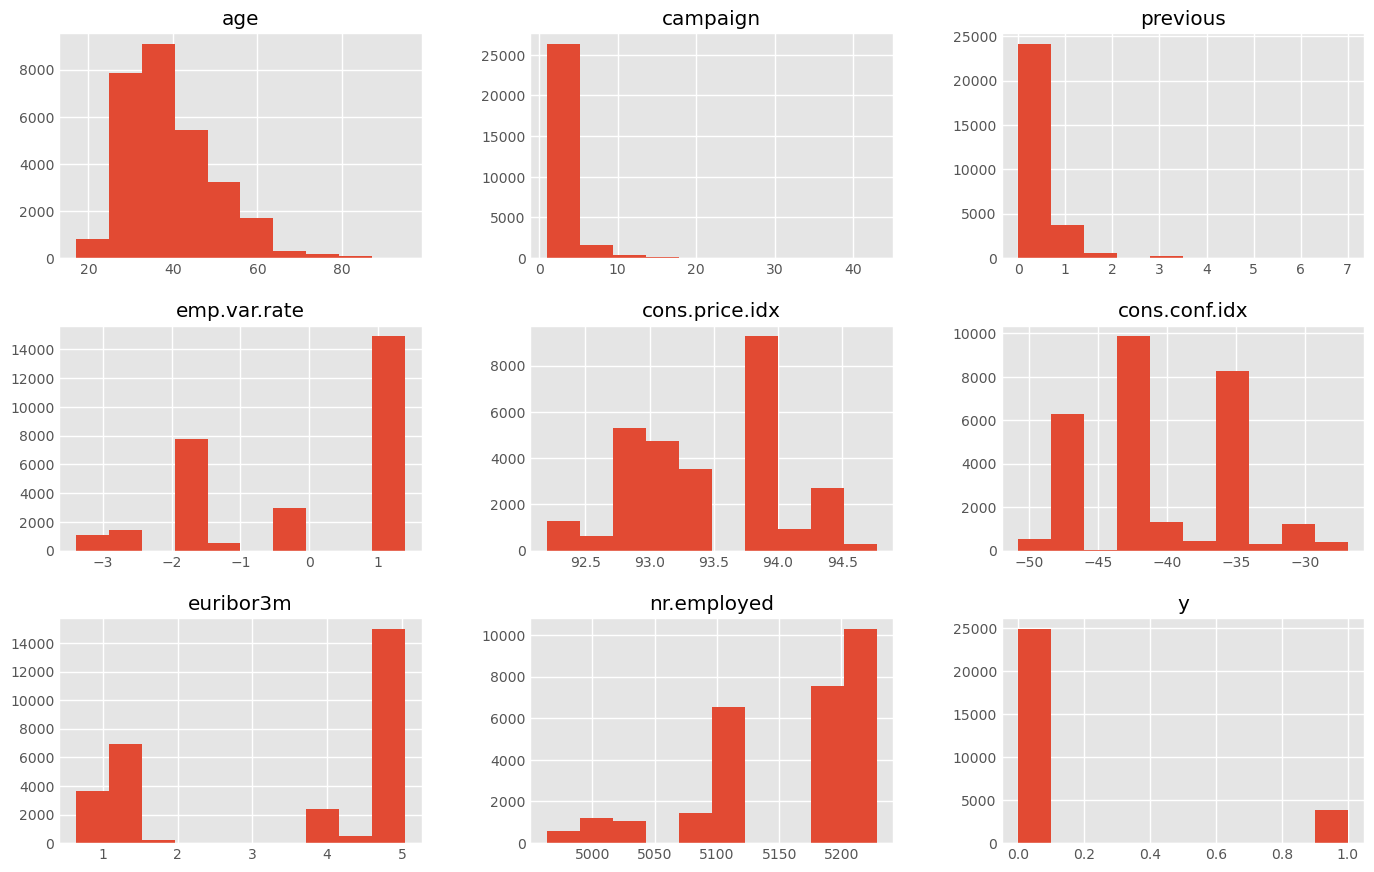

In [69]:
# plt.figure()
df_prep.hist(figsize = (15,10));

#OR

#plt.style.use('default') # overrides the fiverthirthy eight
#df.hist(figsize = (15, 15), grid=False);

#right scue mean is greater that median
# looking at Age, it is right scued and median is around 40 and mean is 50-55.  Mean is higher than the median.

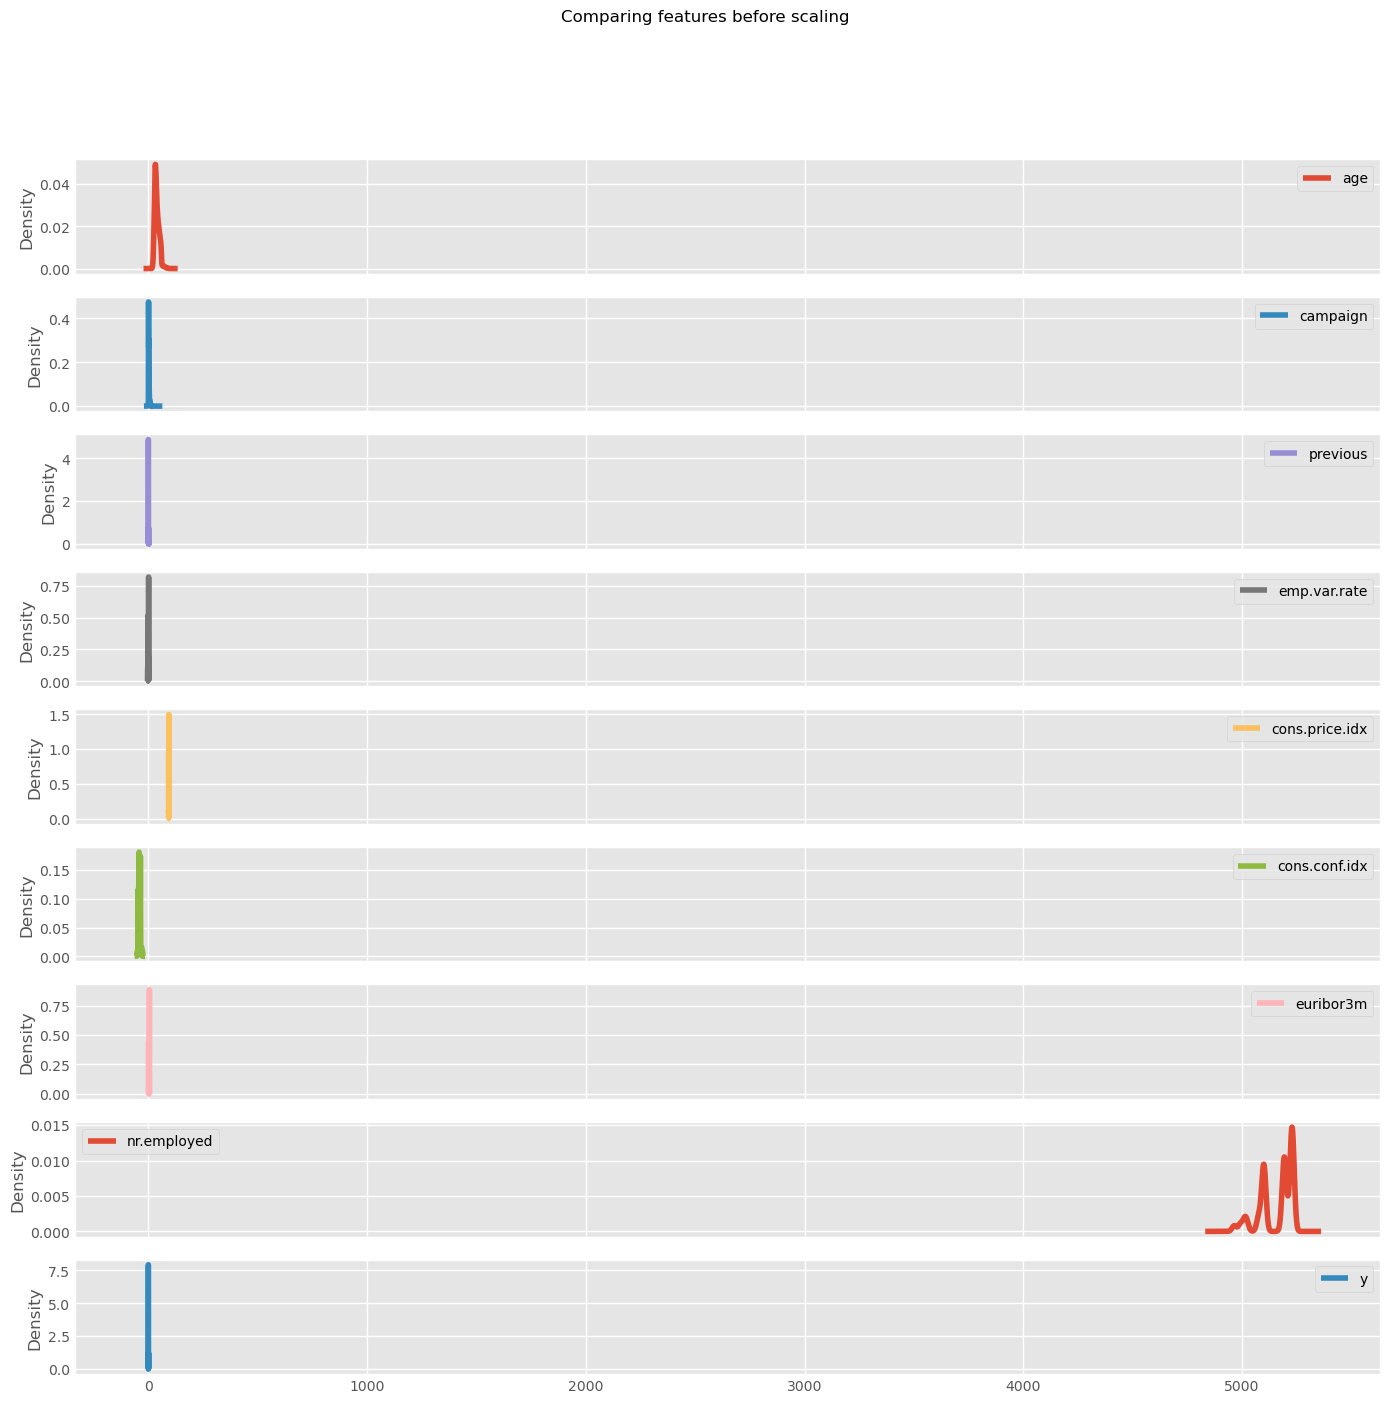

In [80]:
#THIS WILL show that is not same scale as other features

df_prep.plot(kind = 'kde', figsize = (15, 15), subplots = True, title = "Comparing features before scaling");

plt.savefig('pre_scale_plot.png')


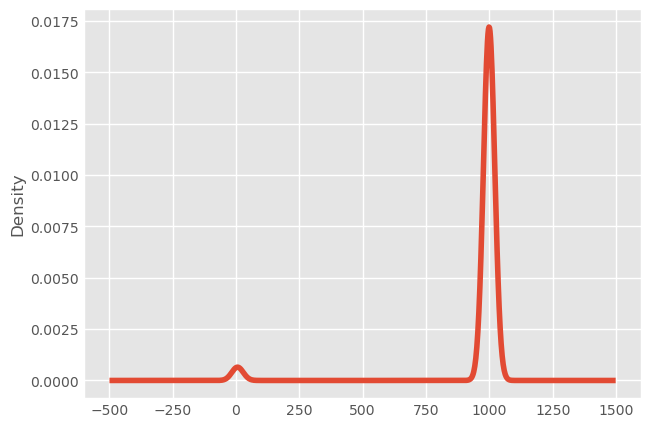

In [83]:
df['pdays'].plot(kind = 'density');

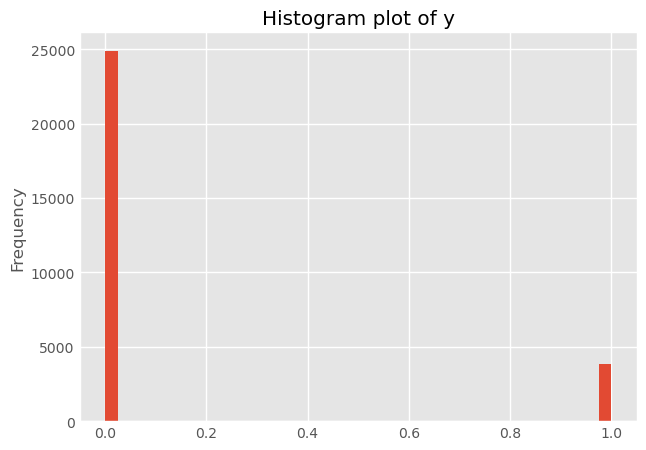

In [85]:
df_prep["y"].plot(kind = 'hist', bins = 40, title = "Histogram plot of y");



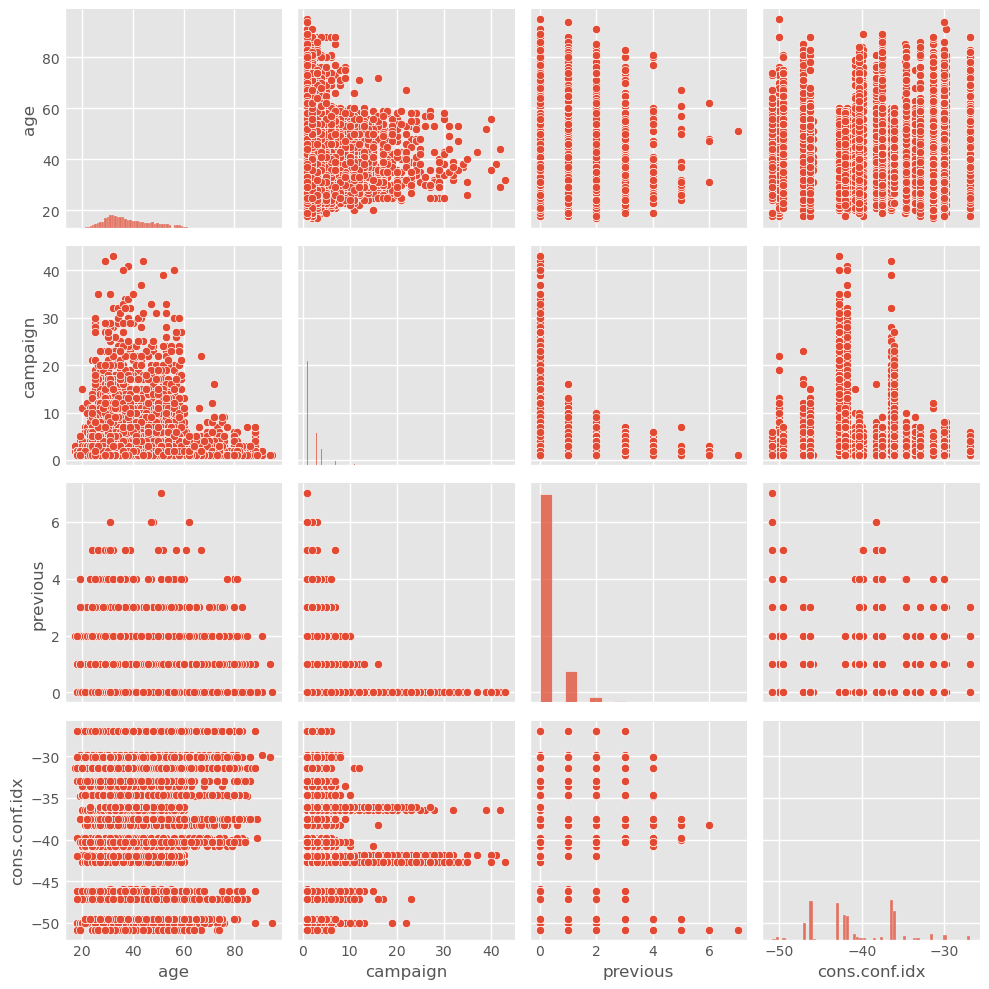

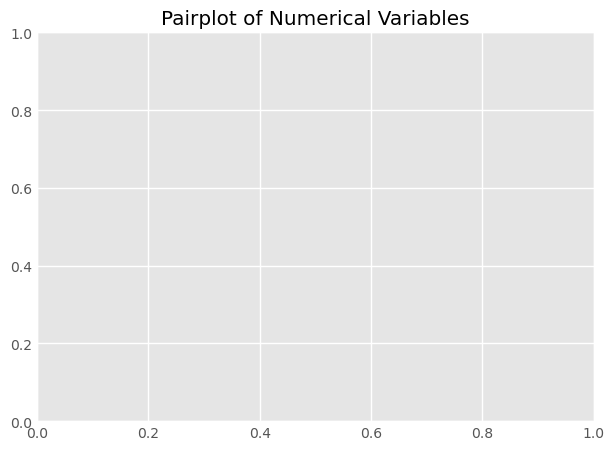

In [96]:
# Pairplot
sns.pairplot(df_prep[['age', 'campaign', 'previous', 'cons.conf.idx']])
plt.tight_layout()
plt.show()
plt.title('Pairplot of Numerical Variables')
plt.savefig('pairplot.png')

### Correlation

In [98]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28705 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             28705 non-null  int64  
 1   job             28705 non-null  object 
 2   marital         28705 non-null  object 
 3   education       28705 non-null  object 
 4   housing         28705 non-null  object 
 5   loan            28705 non-null  object 
 6   contact         28705 non-null  object 
 7   month           28705 non-null  object 
 8   campaign        28705 non-null  int64  
 9   previous        28705 non-null  int64  
 10  poutcome        28705 non-null  object 
 11  emp.var.rate    28705 non-null  float64
 12  cons.price.idx  28705 non-null  float64
 13  cons.conf.idx   28705 non-null  float64
 14  euribor3m       28705 non-null  float64
 15  nr.employed     28705 non-null  float64
 16  y               28705 non-null  int64  
dtypes: float64(5), int64(4), object(8)
m

In [101]:
corr = df_prep.corr(numeric_only=True).round(4)
print(corr)  # Display the correlation matrix to check for NaN values

                   age  campaign  previous  emp.var.rate  cons.price.idx  \
age             1.0000   -0.0080    0.0460       -0.0440         -0.0335   
campaign       -0.0080    1.0000   -0.0884        0.1698          0.1300   
previous        0.0460   -0.0884    1.0000       -0.4034         -0.1771   
emp.var.rate   -0.0440    0.1698   -0.4034        1.0000          0.7683   
cons.price.idx -0.0335    0.1300   -0.1771        0.7683          1.0000   
cons.conf.idx   0.1284   -0.0100   -0.0225        0.1406          0.0191   
euribor3m      -0.0305    0.1526   -0.4391        0.9688          0.6666   
nr.employed    -0.0585    0.1603   -0.4883        0.8981          0.4858   
y               0.0447   -0.0773    0.2253       -0.3026         -0.1278   

                cons.conf.idx  euribor3m  nr.employed       y  
age                    0.1284    -0.0305      -0.0585  0.0447  
campaign              -0.0100     0.1526       0.1603 -0.0773  
previous              -0.0225    -0.4391      -

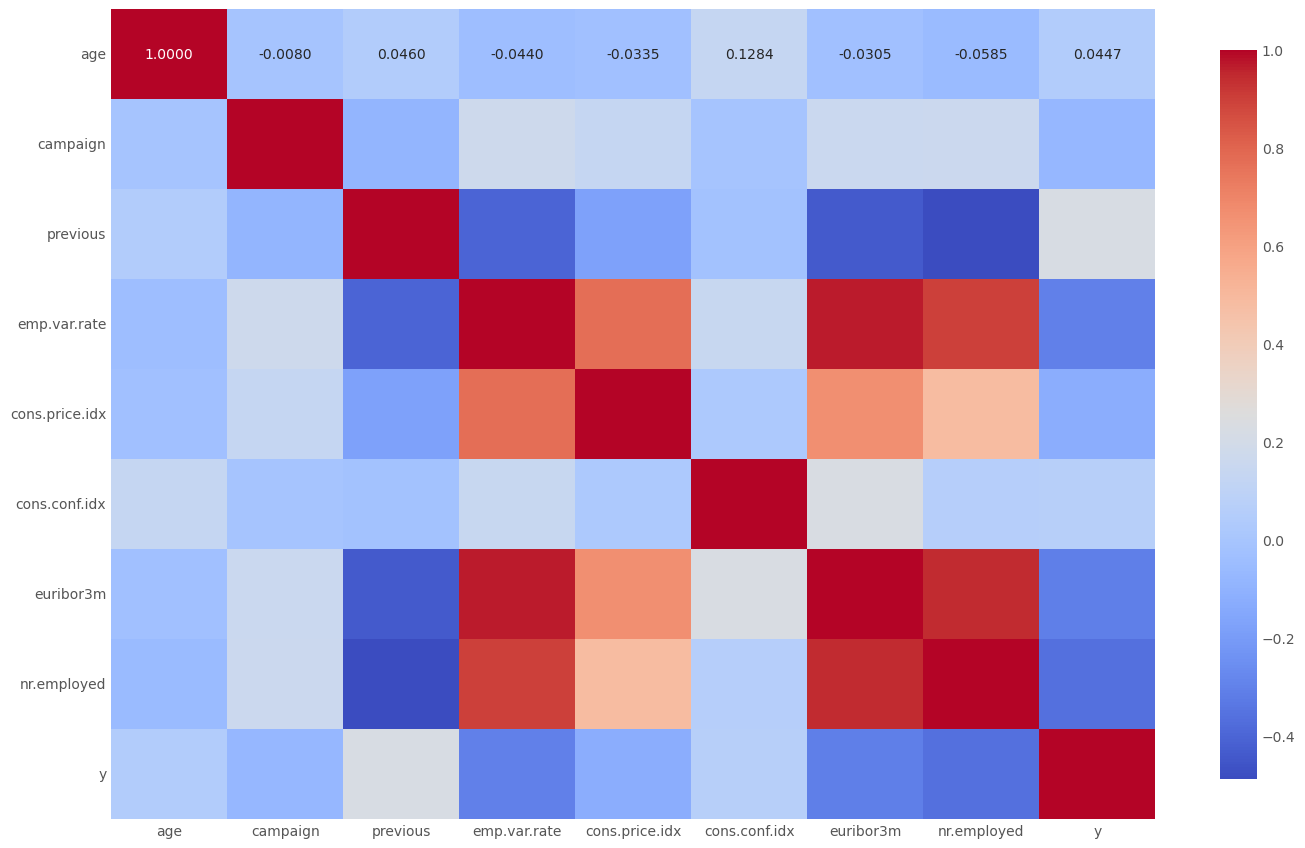

In [103]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, fmt=".4f", cmap='coolwarm', annot_kws={"size": 10}, cbar_kws={"shrink": 0.9})
plt.show()

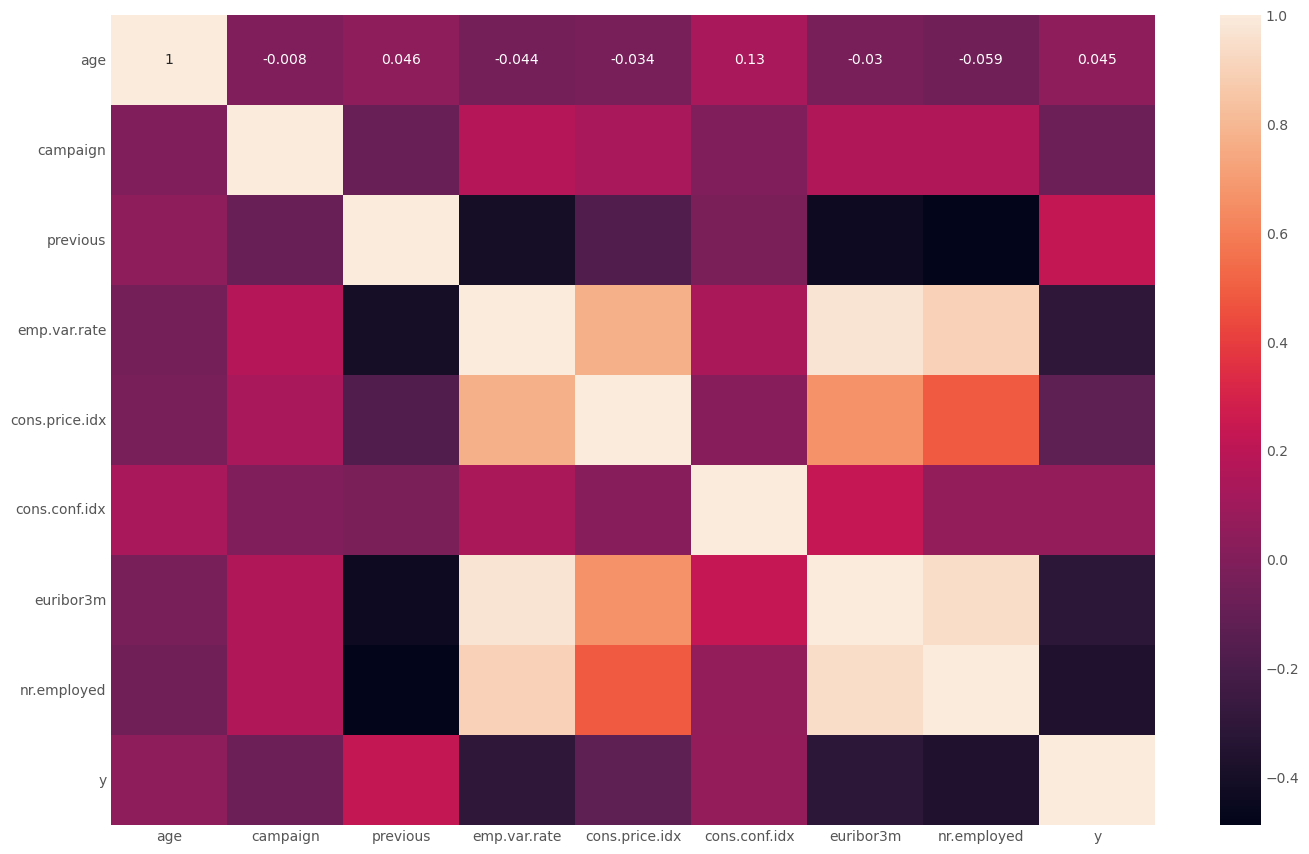

In [105]:
corr = df_prep.corr(numeric_only = True).round(4)

# plot the heatmap
plt.figure(figsize = (15,10))

#viz the heatmap
sns.heatmap(corr, annot= True);

In [107]:
corr_matrix = df_prep[['age', 'campaign', 'previous', 'cons.conf.idx']].corr()

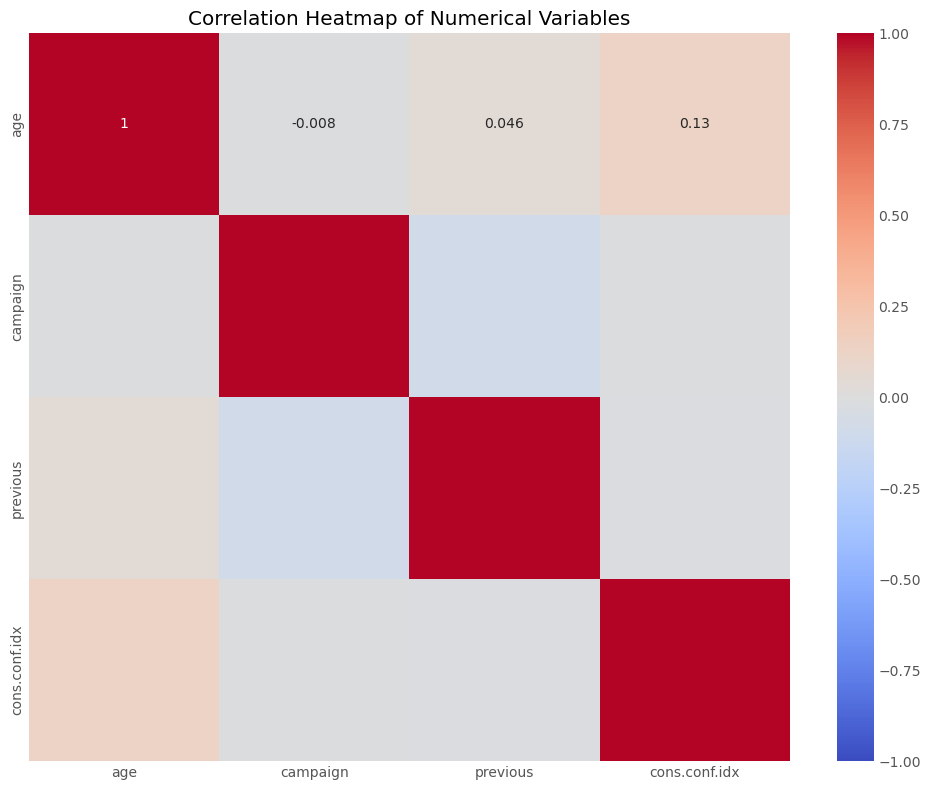

In [109]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [112]:
# fit on train data
# transform the test data
#sklearn combines these two above but only on the training data only. 

#call the model

#scale after train split

#should conduct feature selection for capstone, but where or what step
# I think I have a classification problem since regression will predict a continual value such as the 'percentage increase in sales" or "sale price" classification will predict a set value


In [114]:
df=df_prep
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28705 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             28705 non-null  int64  
 1   job             28705 non-null  object 
 2   marital         28705 non-null  object 
 3   education       28705 non-null  object 
 4   housing         28705 non-null  object 
 5   loan            28705 non-null  object 
 6   contact         28705 non-null  object 
 7   month           28705 non-null  object 
 8   campaign        28705 non-null  int64  
 9   previous        28705 non-null  int64  
 10  poutcome        28705 non-null  object 
 11  emp.var.rate    28705 non-null  float64
 12  cons.price.idx  28705 non-null  float64
 13  cons.conf.idx   28705 non-null  float64
 14  euribor3m       28705 non-null  float64
 15  nr.employed     28705 non-null  float64
 16  y               28705 non-null  int64  
dtypes: float64(5), int64(4), object(8)
m

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

### Data Pre-processing

In [124]:
X = df.drop(columns = 'y')
y = df['y']

In [126]:
# drop non-numeric values

X = df.drop(['y', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'poutcome'], axis=1)
y = df[['y']]

In [128]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=24)

In [130]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(22964, 8)
(22964, 1)
(5741, 8)
(5741, 1)


### Label encoding (changes yes/no to 1/0

In [133]:
encoder = LabelEncoder()

# modify the train
y_train = encoder.fit_transform(y_train)

# modify the test 
y_test = encoder.transform(y_test)

# verify
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Standardization

In [136]:
scaler = StandardScaler()

# train data 
X_train_scaled = scaler.fit_transform(X_train)

# test data 
X_test_scaled = scaler.transform(X_test)

## Converting to a Pandas Dataframe from numpy array

In [139]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)

In [141]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

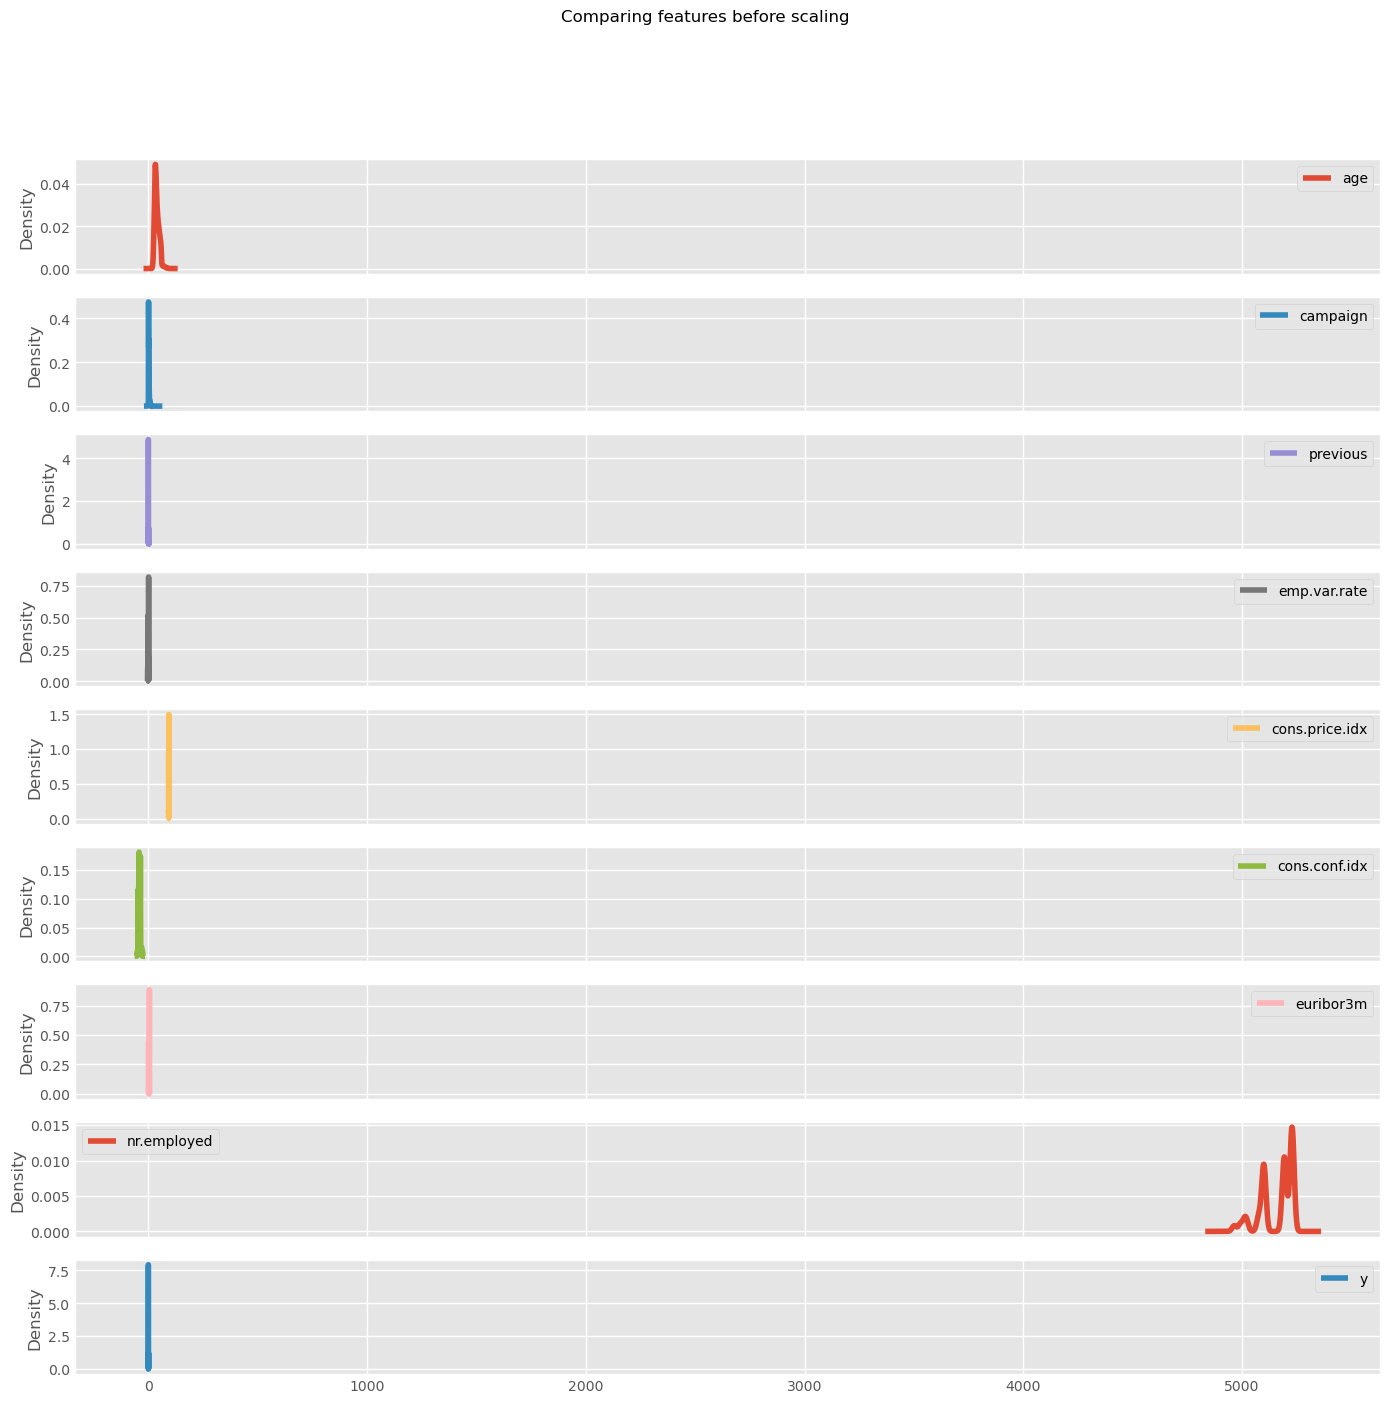

In [143]:
#THIS WILL show that Kurt is not same scale as other features

df_prep.plot(kind = 'kde', figsize = (15, 15), subplots = True, title = "Comparing features before scaling");

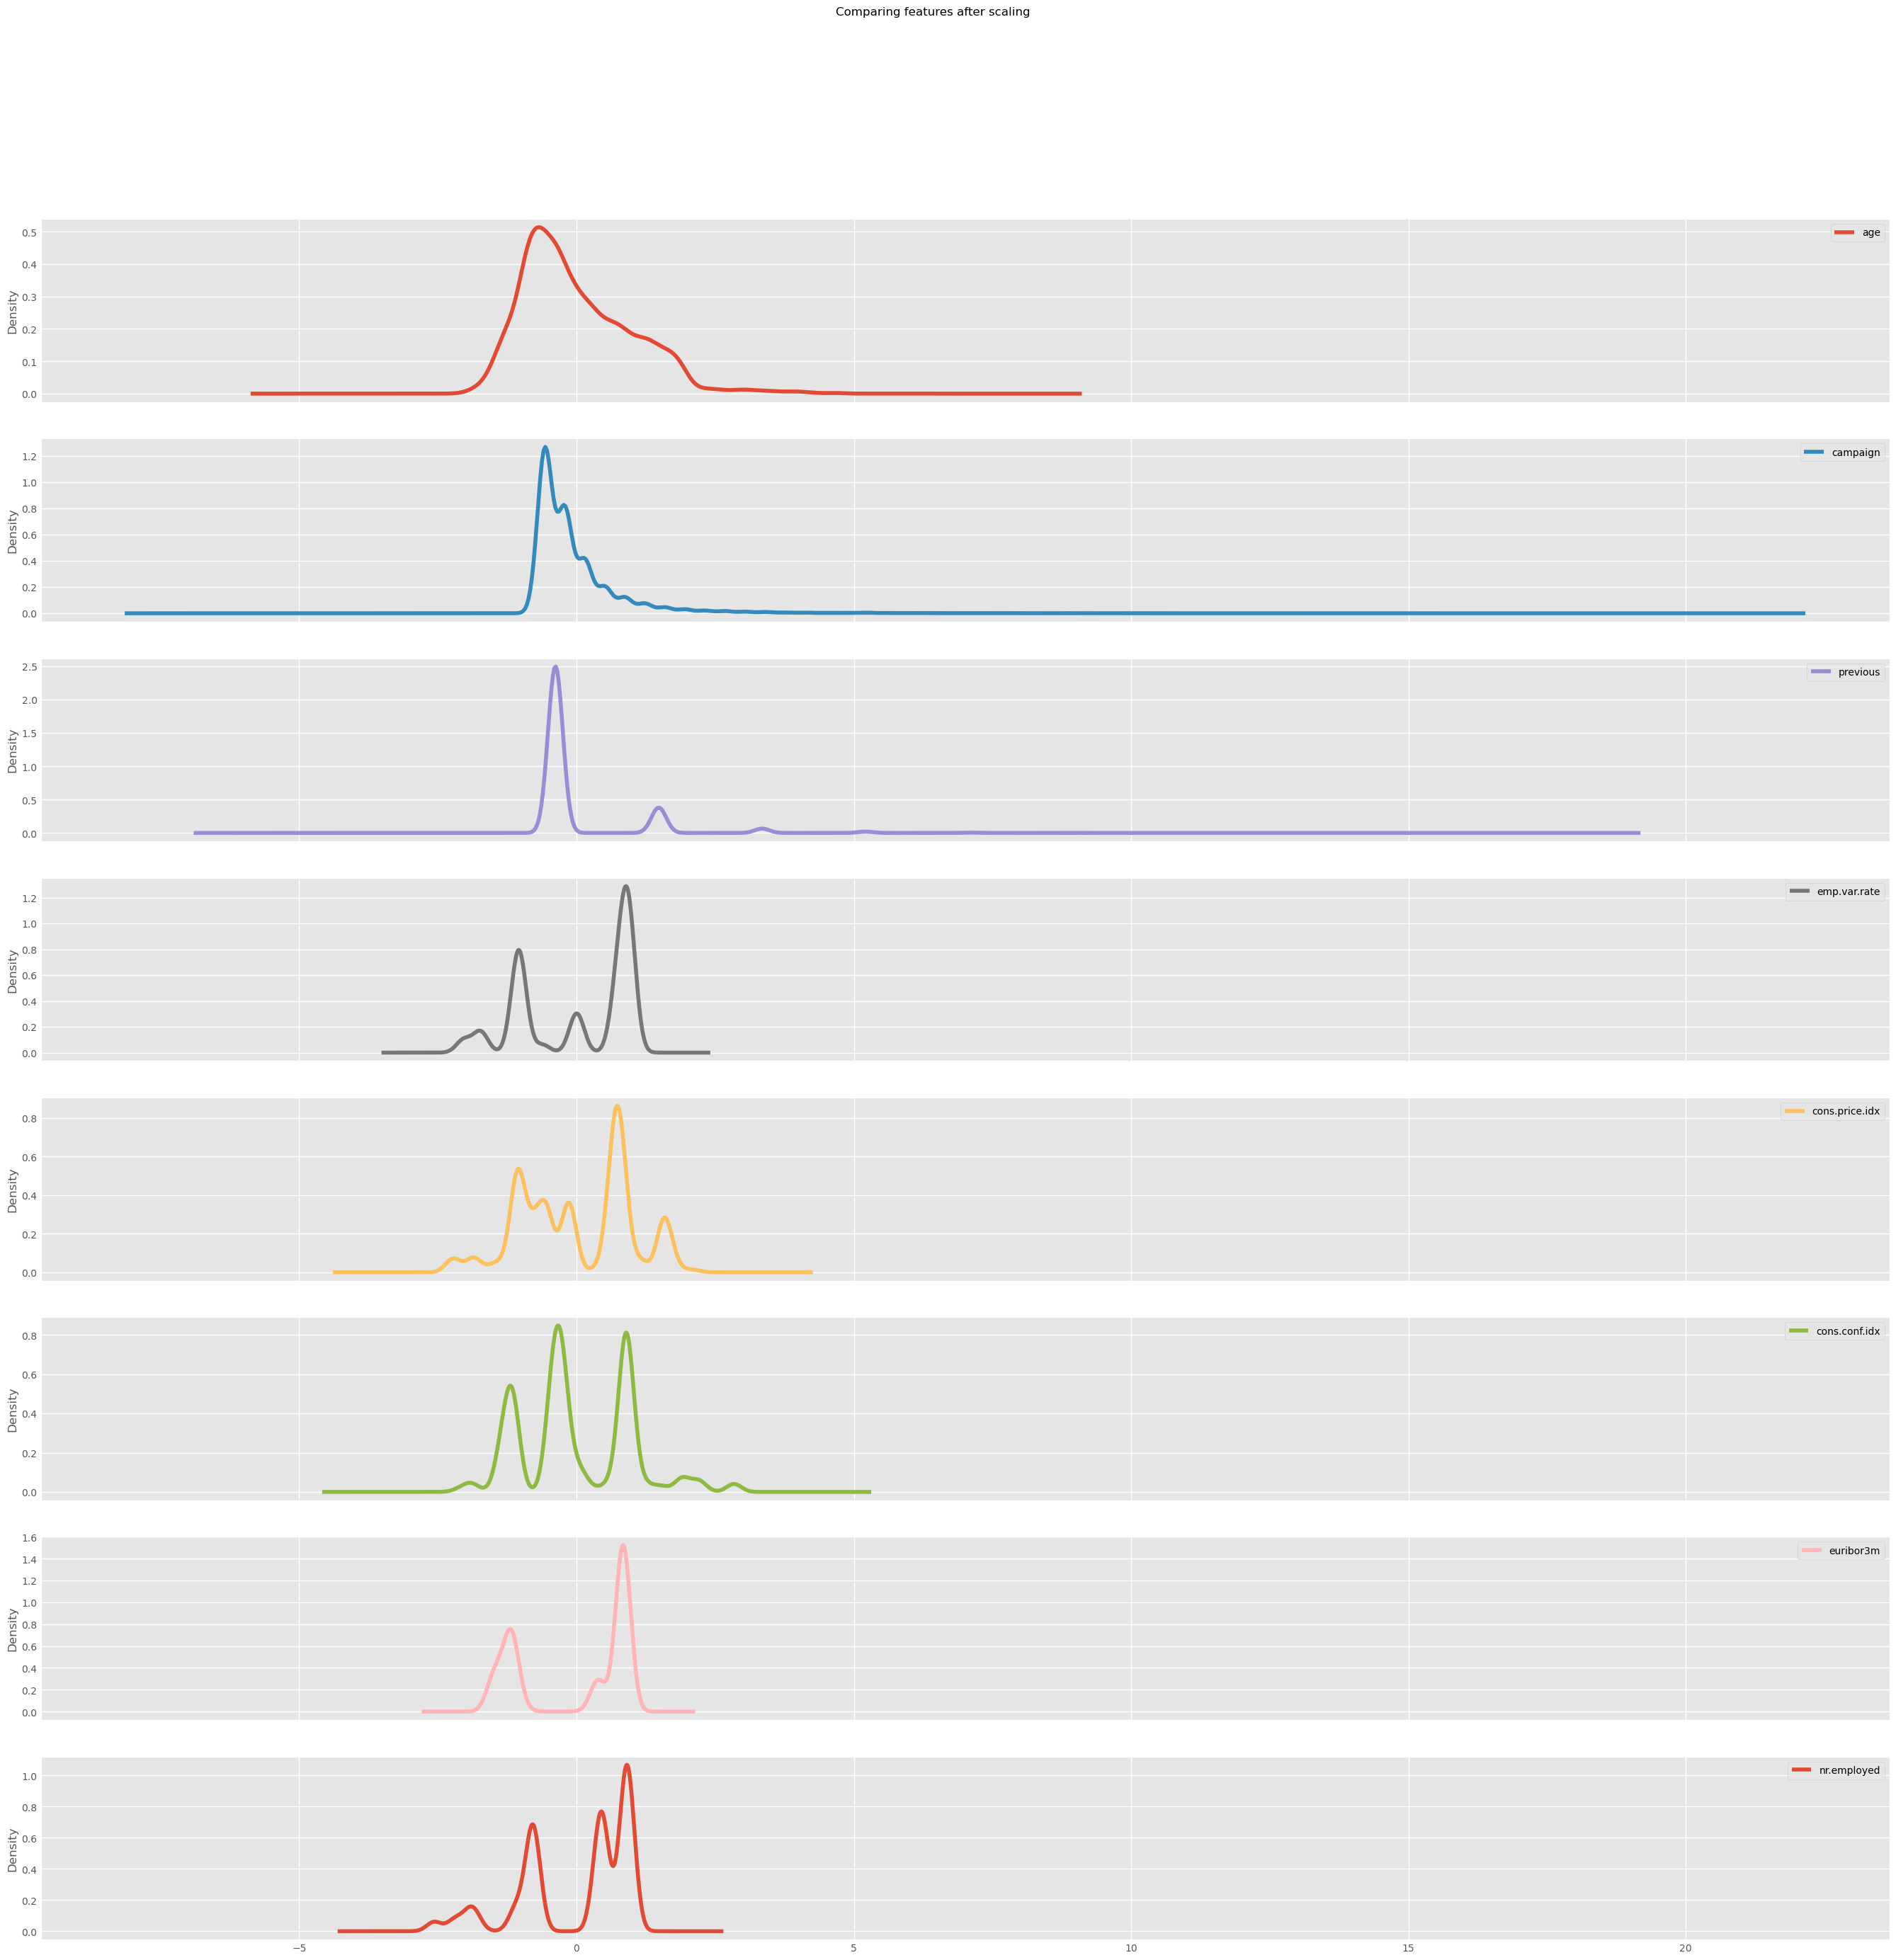

In [145]:
# compared with scaled dataset
X_train_scaled.plot(kind = 'kde', title = "Comparing features after scaling", subplots = True, figsize= (30,30));

plt.savefig('scaled_plot.png')

In [148]:
# to verify data is successfully scaled: mean should be 0 and std should be 1. 
X_train_scaled.agg(['mean', 'std']).round(1)

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
mean,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

### Build a dummy model

In [158]:
dummy = DummyClassifier(strategy= "prior")

In [160]:
# fit the mdel 
dummy.fit(X_train, y_train)

# accuracy score
print("The accuracy of the dummy classifier for train is {:.2%}".format(dummy.score(X_train, y_train)))
print("The accuracy of the dummy classifier for test is {:.2%}".format(dummy.score(X_test, y_test)))

The accuracy of the dummy classifier for train is 86.63%
The accuracy of the dummy classifier for test is 87.06%


In [162]:
np.sum([y_test == 1])

743

In [164]:
np.sum([y_test == 0])

4998

In [166]:
# fit the mdel 
dummy.fit(X_train, y_train)

# accuracy score
print("The accuracy of the dummy classifier for train is {:.2%}".format(dummy.score(X_train, y_train)))
print("The accuracy of the dummy classifier for test is {:.2%}".format(dummy.score(X_test, y_test)))

The accuracy of the dummy classifier for train is 86.63%
The accuracy of the dummy classifier for test is 87.06%


In [168]:
# continue with SVM below

### LInear regression example

In [171]:
#if alpha is 0 it is linear regression.  #alpha will be used to determine the rate that the data is scaled

## Applying models

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [175]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=24)

In [177]:
# calling the object
lg = LogisticRegression()

# fitting the model 
lg.fit(X_train,y_train)

# train score
print(f"The accuracy on the train data is : {lg.score(X_train, y_train):.2f}")

# data viz the classification
plot_classifier(X_train, y_train, lg)

The accuracy on the train data is : 0.87


NameError: name 'plot_classifier' is not defined

In [179]:
X, y = make_classification(n_samples=100, n_features=3, n_classes=2, random_state=42)
classifier = DecisionTreeClassifier().fit(X, y)

# data viz the classification
plot_classifier(X_train, y_train, lg)

NameError: name 'make_classification' is not defined

### Problem 9: Score the Model

What is the accuracy of your model?

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

### Knn  - can lend to overfitting and not good at generalization

In [185]:
#when using KNN need to use a standard scaler
# call the model 
knn = KNeighborsClassifier()

# fit the model 
knn.fit(X_train_transformed, y_train)

# train score
print(f"The accuracy on the train data is : {knn.score(X_train_transformed, y_train):.2f}")

# plot the classification
plot_classifier(X_train_transformed, y_train, knn)

NameError: name 'X_train_transformed' is not defined

### Decision Tree

In [188]:
# call the model 
dt = DecisionTreeClassifier()

# fit the model 
dt.fit(X_train_transformed, y_train)

# train score
print(f"The accuracy on the train data is : {dt.score(X_train_transformed, y_train):.2f}")

# plot the classification
plot_classifier(X_train_transformed, y_train, dt)

NameError: name 'X_train_transformed' is not defined

### Random Forest Classifier

In [191]:
# call the model 
rf = RandomForestClassifier()

# fit the model
rf.fit(X_train_transformed, y_train)

# train score
print(f"The accuracy on the train data is : {rf.score(X_train_transformed, y_train):.2f}")

# plot the decision boundary
plot_classifier(X_train_transformed, y_train, rf)

NameError: name 'X_train_transformed' is not defined

### SVM

In [195]:
#when using KNN need to use a standard scaler

from sklearn.preprocessing import StandardScaler

In [197]:
# intiate 
scaler = StandardScaler()

# fit and transform 
X_scaled = scaler.fit_transform(x)

NameError: name 'x' is not defined

In [199]:
#Converting the numpy array into pandas df for ease of use
x_scaled = pd.DataFrame(x_scaled, columns = x.columns)

NameError: name 'x_scaled' is not defined

In [201]:
#Visually inspect the impact of Scaling

#Density plot of UNscaled data

# if target value is unbalanced you may need to use a 'stratisfy" 

In [203]:
x.plot(kind = 'kde', subplots = True);

NameError: name 'x' is not defined

In [205]:
#Density plot of Scaled data

x_scaled.plot(kind = 'kde', subplots = True);

NameError: name 'x_scaled' is not defined

In [207]:
x_scaled.agg(['mean', 'std']).round(1)

# if successfully scaled the mean will be 0 and the std will be 1.0

NameError: name 'x_scaled' is not defined

In [209]:
# call the model (on unscaled data)
svc = SVC() #Default hyperparameters

# fit the model 
svc.fit(X_train,y_train)

# score the model 
print("The accuracy of the SVC for train is {:.2%}".format(svc.score(X_train, y_train)))
print("The accuracy of the SVC for test is {:.2%}".format(svc.score(X_test, y_test)))

The accuracy of the SVC for train is 86.63%
The accuracy of the SVC for test is 87.06%


### Tuning the model

* We can change: Kernels, C values, gamma values
* within polynomial kernels we can also have change in the degree
### GridSearch

### Create a dictionary

In [627]:
kernel_range = ['linear', 'poly', 'rbf', 'sigmoid']
C_range = range(1, 10, 2)
degree_range = range(1, 5)
max_iter_range = [-1, 1, 2]

# putting it togther
grid = dict(kernel = kernel_range, C = C_range, degree = degree_range, max_iter = max_iter_range)

In [629]:
grid

{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
 'C': range(1, 10, 2),
 'degree': range(1, 5),
 'max_iter': [-1, 1, 2]}

In [631]:
### Gride Usage

In [ ]:
grid_search = GridSearchCV(estimator = SVC() 
                           ,param_grid = grid
                           ,n_jobs = -1
                           ,cv = 3
                           ,scoring ='accuracy')

# fit the model on train data
grid_result = grid_search.fit(X_train_transformed, y_train)

# summarize results
grid_result_df = pd.DataFrame(grid_result.cv_results_)





In [635]:
# grid_result_df.sort_values(by = 'rank_test_score').head(5)

In [637]:
grid_result.best_estimator_

NameError: name 'grid_result' is not defined

In [ ]:
grid_result.best_score_

In [ ]:
grid_predictions = grid_result.predict(X_test_scaled) 

In [ ]:
# print classification report 
print(classification_report(y_test, grid_predictions)) 

## Build the SMV Classifier

In [642]:
# call the model 
svm = SVC(kernel = "linear")

# fit the model 
svm.fit(X_train_transformed,y_train)

# plot the classification done by model 
plot_classifier(X_train_transformed,y_train, svm) # the lims stand for axis limits

NameError: name 'plot_classifier' is not defined

In [644]:
# Highlighting the use of support vectors
# get the dimensions of the data 

print("Number of original examples:", len(x))
print("Number of support vectors:", len(svm.support_))

# Extract only the support vectors from data 
x_small = x_scaled.iloc[svm.support_]
y_small = y.iloc[svm.support_]

# # Train a new SVM using only the support vectors
svm_small = SVC(kernel = "linear")
svm_small.fit(x_small, y_small)
plot_classifier(x_small, y_small, svm_small)

NameError: name 'x' is not defined

<div class="alert alert-block alert-info">

### Changing the Kernels 
    
The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

```
1.Linear
2.Polynomial
3.Radial basis function (RBF)
4.Sigmoid
```

Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset, we usually choose different functions in turn and compare the results. 

In [646]:
# making a list of the different kernel functions 
kernel_states = ["linear", "poly", "rbf", "sigmoid"]

# applying a loop to apply these kernel states
for k in kernel_states:
    print("The kernel applied is:", k)
    svm = SVC(kernel = k)
    svm.fit(X_train_transformed,y_train)
    
    print(f"The accuracy on the whole data is : {svm.score(X_train_transformed,y_train):.2f}")
    
    plot_classifier(X_train_transformed,y_train, svm)
    

The kernel applied is: linear
The accuracy on the whole data is : 0.87


NameError: name 'plot_classifier' is not defined

In [648]:
## How does different model performance vary based on data scaling

In [650]:
dt = DecisionTreeClassifier()

lg = LogisticRegression()

rf = RandomForestClassifier()

knn = KNeighborsClassifier()

svc = SVC()

In [351]:
# Models to compare
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'KNearestNeighbors': KNeighborsClassifier(),
    'SVC': SVC(),
    'DecisionTree': DecisionTreeClassifier()
}

In [353]:
# Dictionary to store results
results = {}

In [356]:
# Train and evaluate each model
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    
    results[name] = {
        'train_time': train_time,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall
    }

In [359]:
# Print results
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Training Time: {metrics['train_time']:.4f} seconds")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print("\n")

Model: LogisticRegression
Training Time: 0.3940 seconds
Accuracy: 0.8734
Precision: 0.7146
Recall: 0.5566


Model: KNearestNeighbors
Training Time: 0.0316 seconds
Accuracy: 0.8699
Precision: 0.6973
Recall: 0.6188


Model: SVC
Training Time: 3.4424 seconds
Accuracy: 0.8706
Precision: 0.4353
Recall: 0.5000


Model: DecisionTree
Training Time: 0.0465 seconds
Accuracy: 0.8486
Precision: 0.6435
Recall: 0.6129




In [ ]:
### Test Data accuracy scores for Scaled Data

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

## Recommendations

### Hyperparameter Tuning

In [366]:
# Choose the model to optimize based on the desired metric (e.g., 'accuracy')
chosen_metric = 'accuracy'
best_model_name = max(results, key=lambda x: results[x][chosen_metric])
best_model = models[best_model_name]
print(best_model)

LogisticRegression(max_iter=1000)


In [368]:
# Hyperparameter tuning using GridSearchCV
param_grid = {}
if best_model_name == 'LogisticRegression':
    param_grid = {'C': [0.1, 1, 10, 100]}
elif best_model_name == 'KNearestNeighbors':
    param_grid = {'n_neighbors': [3, 5, 7, 9]}
elif best_model_name == 'SVC':
    param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}

grid_search = GridSearchCV(best_model, param_grid, scoring=chosen_metric, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 1, 10, 100]}, scoring='accuracy')

In [370]:
# Print best parameters and corresponding performance
print(f"Best Model: {best_model_name}")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best {chosen_metric.capitalize()}: {grid_search.best_score_:.4f}")

Best Model: LogisticRegression
Best Parameters: {'C': 10}
Best Accuracy: 0.8704


In [373]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nFinal Model Evaluation on Test Set")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='macro'):.4f}")


Final Model Evaluation on Test Set
Accuracy: 0.8735
Precision: 0.7162
Recall: 0.5567


In [383]:
# Train and evaluate each model
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # Predictions on train and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_precision = precision_score(y_train, y_train_pred, average='macro')
    test_precision = precision_score(y_test, y_test_pred, average='macro')
    
    train_recall = recall_score(y_train, y_train_pred, average='macro')
    test_recall = recall_score(y_test, y_test_pred, average='macro')
    
    results[name] = {
        'train_time': train_time,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'train_precision': train_precision,
        'test_precision': test_precision,
        'train_recall': train_recall,
        'test_recall': test_recall
    }


In [384]:
# Don't run?
# Convert the results dictionary to a DataFrame
df_results = pd.DataFrame.from_dict(results, orient='index')

# Display the DataFrame
print(df_results)

                    train_time  train_accuracy  test_accuracy  \
LogisticRegression    0.398813        0.871146       0.873367   
KNearestNeighbors     0.028972        0.892789       0.869883   
SVC                   3.387884        0.866269       0.870580   
DecisionTree          0.047040        0.952447       0.848284   

                    train_precision  test_precision  train_recall  test_recall  
LogisticRegression         0.727586        0.714596      0.562705     0.556600  
KNearestNeighbors          0.794366        0.697347      0.674464     0.618765  
SVC                        0.433134        0.435290      0.500000     0.500000  
DecisionTree               0.962203        0.642278      0.829642     0.611516  


| Model              | Train Time (s) | Train Accuracy | Test Accuracy | Train Precision | Test Precision | Train Recall | Test Recall |
|--------------------|----------------|----------------|---------------|----------------|---------------|--------------|-------------|
| LogisticRegression | 0.398813       | 0.871146       | 0.873367      | 0.727586       | 0.714596      | 0.562705     | 0.556600    |
| KNearestNeighbors  | 0.028972       | 0.892789       | 0.869883      | 0.794366       | 0.697347      | 0.674464     | 0.618765    |
| SVC                | 3.387884       | 0.866269       | 0.870580      | 0.433134       | 0.435290      | 0.500000     | 0.500000    |
| DecisionTree       | 0.047040       | 0.952447       | 0.848284      | 0.962203       | 0.642278      | 0.829642     | 0.611516    |


##### Questions